# Movie Recommendation System

### Extraction Transformation and Loading

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.... ")

In [ ]:
# Importing data

movies = pd.read_csv(r'C:\Users\User\Desktop\Projects\Movie_Recommendation_system\archive\tmdb_5000_movies.csv')
credits = pd.read_csv(r'C:\Users\User\Desktop\Projects\Movie_Recommendation_system\archive\tmdb_5000_credits.csv')
import pandas as pd

movies.rename(columns={'id': 'movie_id'}, inplace=True)


movies = movies.merge(credits, on = 'movie_id')
print("Data loaded successfully....")

## 1. Demographic filtering

What we need:
* Metric to score movies.
* Calculate score for each movie.
* Sort scores and recommend.



To calculate wighted rating, the formula used is in the link: https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system

where,

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart; (Constant value)
* R is the average rating of the movie; And
* C is the mean vote across the whole report (Constant value)
* We already have v(vote_count) and R (vote_average) and C can be calculated as

In [17]:
C = movies['vote_average'].mean()

C

Next step is to determine m. We will use the 90th percentile as our cut off.

In [19]:
m = movies['vote_count'].quantile(0.9)

m

1838.4000000000015

In [21]:
#Movies that have a minimum of m votes

q_movies = movies.copy().loc[movies['vote_count'] >= m]

q_movies.shape

(481, 23)

In [26]:
def weighted_rating(x, C=C, m=m):
    v = x['vote_count']
    R = x['vote_average']

    return (v/(v+m) * R) + (m/(v+m) * C)

In [27]:
q_movies["Scores"] = q_movies.apply(weighted_rating, axis = 1)

In [31]:
q_movies = q_movies.sort_values('Scores', ascending = False)

In [33]:
q_movies.loc[:, ['original_title', 'vote_average', 'vote_count', 'Scores']]

,original_title,vote_average,vote_count,Scores
1881,The Shawshank Redemption,8.5,8205,8.059258
662,Fight Club,8.3,9413,7.939256
65,The Dark Knight,8.2,12002,7.920020
3232,Pulp Fiction,8.3,8428,7.904645
96,Inception,8.1,13752,7.863239
...,...,...,...,...
41,Green Lantern,5.1,2487,5.521697
337,A Good Day to Die Hard,5.2,3493,5.507643
193,After Earth,5.0,2532,5.459420
91,Independence Day: Resurgence,4.9,2491,5.406234


Text(0.5, 1.0, 'Popular Movies')

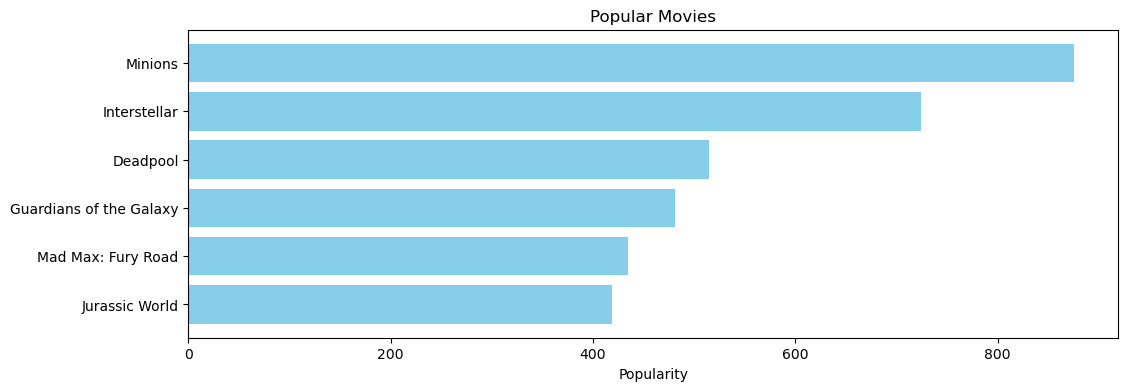

In [35]:
pop= movies.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['original_title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")